# 1) Quadratic form positivity

In [2]:
using Pkg
using LinearAlgebra

### a)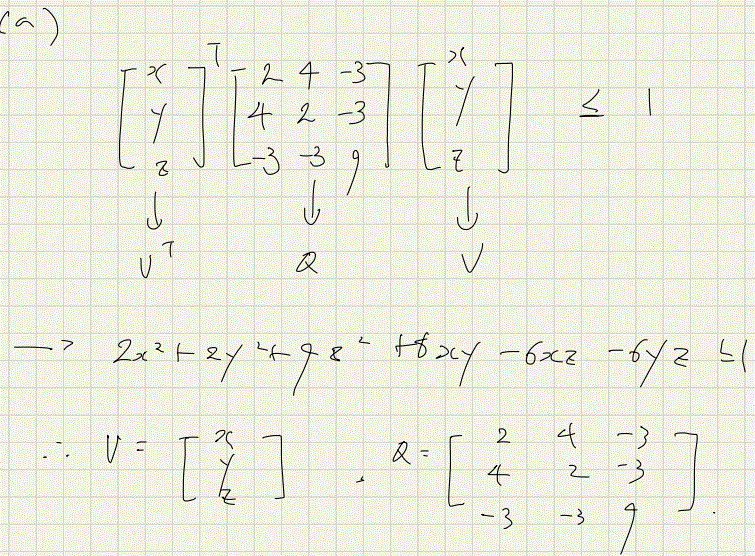

### b)

In [2]:
Q = [2 4 -3
4 2 -3
-3 -3 9]

3×3 Matrix{Int64}:
  2   4  -3
  4   2  -3
 -3  -3   9

In [3]:
(L,U) = eigen(Q);

In [4]:
L = diagm(L)
L

3×3 Matrix{Float64}:
 -2.0  0.0   0.0
  0.0  3.0   0.0
  0.0  0.0  12.0

- As shown above, not all the eigenvalues are positive so that the set of (x,y,z) satisfying the constraint(1) is not an ellipsoid

### c) Norm representation 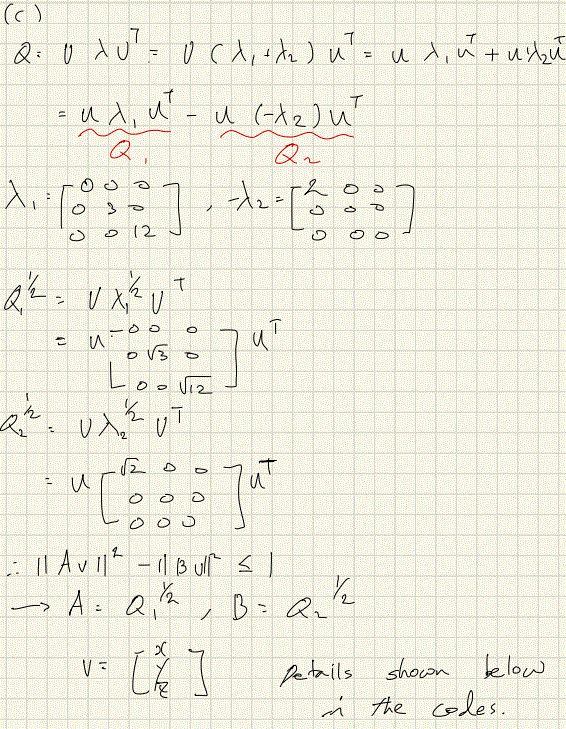

In [5]:
U*L*U'

3×3 Matrix{Float64}:
  2.0   4.0  -3.0
  4.0   2.0  -3.0
 -3.0  -3.0   9.0

In [6]:
lamb1 = [0 0 0
0 3 0
0 0 12]

3×3 Matrix{Int64}:
 0  0   0
 0  3   0
 0  0  12

In [7]:
lamb2 = [2 0 0
0 0 0
0 0 0]

3×3 Matrix{Int64}:
 2  0  0
 0  0  0
 0  0  0

In [8]:
Q1 = U*lamb1*U'
Q1

3×3 Matrix{Float64}:
  3.0   3.0  -3.0
  3.0   3.0  -3.0
 -3.0  -3.0   9.0

In [9]:
Q2 = U*lamb2*U'

3×3 Matrix{Float64}:
  1.0  -1.0  0.0
 -1.0   1.0  0.0
  0.0  -0.0  0.0

In [10]:
Q1 - Q2

3×3 Matrix{Float64}:
  2.0   4.0  -3.0
  4.0   2.0  -3.0
 -3.0  -3.0   9.0

In [11]:
lamb1 = [0 0 0
0 sqrt(3) 0
0 0 sqrt(12)];

labm2 = [sqrt(2) 0 0
0 0 0
0 0 0];

In [12]:
A = U*lamb1*U';
B = U*lamb2*U';

In [13]:
println("vector v: ")
v = ["x"
"y"
"z"]

vector v: 


3-element Vector{String}:
 "x"
 "y"
 "z"

In [14]:
println("Matrix A: ")
A

Matrix A: 


3×3 Matrix{Float64}:
  1.1547    1.1547   -0.57735
  1.1547    1.1547   -0.57735
 -0.57735  -0.57735   2.88675

In [15]:
println("Matrix B: ")
B

Matrix B: 


3×3 Matrix{Float64}:
  1.0  -1.0  0.0
 -1.0   1.0  0.0
  0.0  -0.0  0.0

### d)

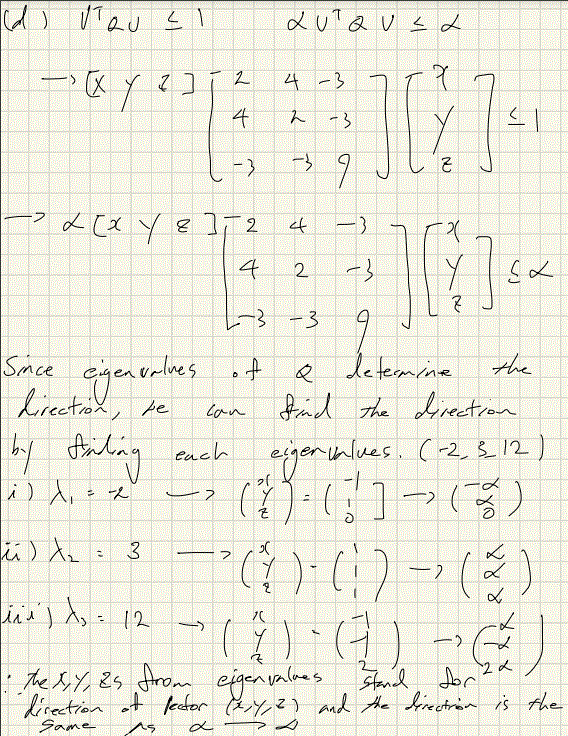

# 2) Enclosing circle

In [3]:
using Clp
using PyPlot
using JuMP, Mosek, MosekTools, Gurobi

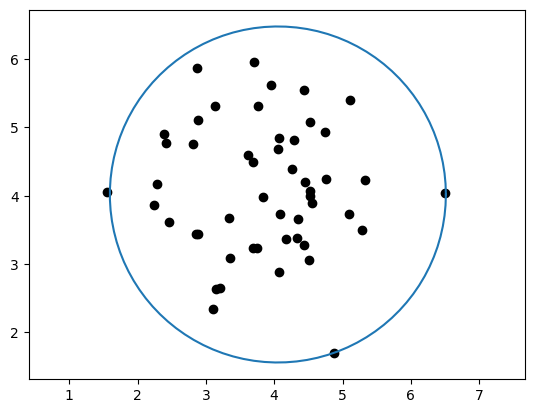

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-16
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 0 rows, 3 columns and 0 nonzeros
Model fingerprint: 0x3b24bad5
Model has 50 quadratic constraints
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
  QRHS range       [2e+01, 6e+01]
Presolve time: 0.00s
Presolved: 198 rows, 201 columns, 496 nonzeros
Presolved model has 50 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 4
 AA' NZ     : 6.920e+02
 Factor NZ  : 1.295e+03
 Factor Ops : 8.617e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         P

In [463]:
X = 4 .+ randn(2,50) # generate 50 random points
# t = range(0,stop=2pi,length=100) # parameter that traverses the circle
# r = 2; x1 = 4; x2 = 4 # radius and coordinates of the center
# plot( x1 .+ r*cos.(t), x2 .+ r*sin.(t)) # plot circle radius r with center (x1,x2)
# scatter( X[1,:], X[2,:], color="black") # plot the 50 points
# axis("equal") # make x and y scales equal

m = Model(optimizer_with_attributes(Gurobi.Optimizer))
@variable(m, x)
@variable(m, y)
@variable(m, r >= 0) 
@objective(m, Min, r) 
@constraint(m, bound[i = 1:50;], (x - X[1,i])^2 + (y - X[2,i])^2 <= r)
optimize!(m)

t = range(0,stop=2pi,length=100) # parameter that traverses the circle
plot( value.(x) .+ sqrt(value.(r))*cos.(t), value.(y) .+ sqrt(value.(r))*sin.(t)) 
scatter( X[1,:], X[2,:], color="black") # plot the 50 points
axis("equal") 


ropt = sqrt(JuMP.value(r))
xopt = JuMP.value(x)
yopt = JuMP.value(y)

println(ropt)
println(xopt)
println(yopt)

- Decision variables are center(x,y) and the radius(r). In this problem, we are trying to minimize the maximum radius. Constraints indiciate that the distances between all 50 random points and the center should be less than or eqaul to the radius such that all the points stay inside the circle. Then, we can easily get the optimized radius and the center x and y.

# 3) The Huber loss

In [37]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = [6.31,3.78,5.12,1.71,2.99,4.53,2.11,3.88,4.67,26,2.06,23,1.58,2.17,0.02]


m3 = Model(optimizer_with_attributes(Gurobi.Optimizer))
@variable(m3, a)
@variable(m3, b)
@objective(m3, Min, sum((y[i] .-a*x[i] .-b)^2 for i in 1:15))
optimize!(m3)
aopt = JuMP.value(a);
bopt = JuMP.value(b);
println(aopt)
println(bopt)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-16
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0xa32a9345
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [2e+02, 2e+03]
  QObjective range [3e+01, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 3
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.37046870e+03  1.37046870e+03  0.00

In [38]:
x2 = [1,2,3,4,5,6,7,8,9,11,13,14,15]
y2 = [6.31,3.78,5.12,1.71,2.99,4.53,2.11,3.88,4.67,2.06,1.58,2.17,0.02]


m4 = Model(optimizer_with_attributes(Gurobi.Optimizer))
@variable(m4, a)
@variable(m4, b)
@objective(m4, Min, sum((y2[i] .-a*x2[i] .-b)^2 for i in 1:13))
optimize!(m4)
aopt2 = JuMP.value(a);
bopt2 = JuMP.value(b);
println(aopt2)
println(bopt2)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-16
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0x3f16fcbb
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [8e+01, 5e+02]
  QObjective range [3e+01, 2e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 3
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.65468700e+02  1.65468700e+02  0.00

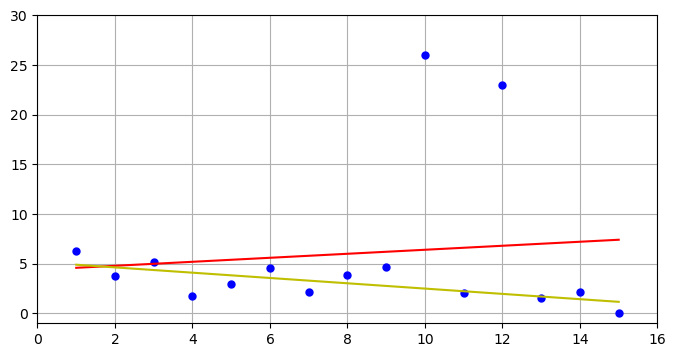

In [39]:
figure(figsize=(8,4))
plot(x,y,"b.", markersize=10)
plot(x, aopt*x .+ bopt, "r-")
plot(x2, aopt2*x2 .+ bopt2, "y-")
axis([0,16,-1,30])
grid("True")

- When do the linear fit computation with all the data points (including outliers), we get positive linear fit. However, when we do the linear fit computation without outliers, we get negative linear fit.

# b)

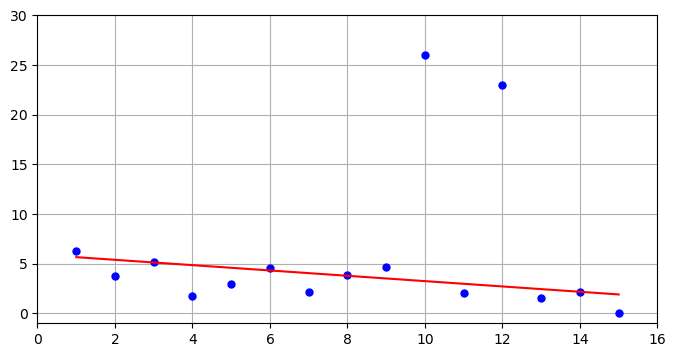

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-16
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 30 rows, 17 columns and 90 nonzeros
Model fingerprint: 0x2a306e8a
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-02, 3e+01]
Presolve removed 15 rows and 0 columns
Presolve time: 0.00s
Presolved: 15 rows, 17 columns, 45 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
      17    5.7114545e+01   0.000000e+00   0.000000e+00      0s

Solved in 17 iterations and 0.00 seconds (0.00 work units)
Optimal objective  5.711454545e+01

User-callback calls 91, time in user-callback 0.00 sec
-0.2681818181818182
5.924545454545455


In [45]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = [6.31,3.78,5.12,1.71,2.99,4.53,2.11,3.88,4.67,26,2.06,23,1.58,2.17,0.02]


m5 = Model(optimizer_with_attributes(Gurobi.Optimizer))
@variable(m5, a)
@variable(m5, b)
@variable(m5, t[1:15])
@constraint(m5, abs1[i = 1:15;], t[i] >= y[i] .- a* x[i] .- b)
@constraint(m5, abs2[i = 1:15;], t[i] >= -y[i] .+ a* x[i] .+ b)
@objective(m5, Min, sum(t))

optimize!(m5)
aopt3 = JuMP.value(a);
bopt3 = JuMP.value(b);
println(aopt3)
println(bopt3)

figure(figsize=(8,4))
plot(x,y,"b.", markersize=10)
plot(x, aopt3*x .+ bopt3, "r-")
axis([0,16,-1,30])
grid("True")

- L1 cost handle outliers better than least sqaures because the linear fit of L1 cost function seems to similar the L2 linear fit excluding outliers (negative slope) even though it includes the outliers. Therefore, even though we didn't manually exclude the outliers in L1 cost handles outliers well.

# c)

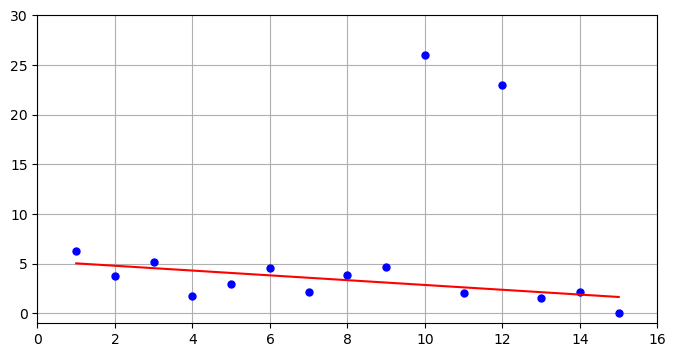

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-16
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 30 rows, 47 columns and 120 nonzeros
Model fingerprint: 0x505c6039
Model has 15 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 3e+01]
Presolve time: 0.00s
Presolved: 75 rows, 77 columns, 210 nonzeros
Presolved model has 15 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 Dense cols : 2
 Free vars  : 2
 AA' NZ     : 2.100e+02
 Factor NZ  : 3.780e+02
 Factor Ops : 2.030e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual   

In [50]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = [6.31, 3.78, 5.12, 1.71, 2.99, 4.53, 2.11, 3.88, 4.67, 26, 2.06, 23, 1.58, 2.17, 0]

m6 = Model(optimizer_with_attributes(Gurobi.Optimizer))
@variable(m6, a)
@variable(m6, b)
@variable(m6, w[1:15]<=1)
@variable(m6, v[1:15]>=0)
@variable(m6, t[1:15])
@constraint(m6,abs3[i= 1:15;], t[i]>= w[i]^2 .+ 2*v[i])
@constraint(m6,abs1[i = 1:15;], w[i]+v[i] >= y[i] .- a* x[i] .- b )
@constraint(m6,abs2[i = 1:15;], w[i]+v[i] >= -y[i] .+ a* x[i] .+ b)
@objective(m6, Min, sum(t))

optimize!(m6)
aopt4 = JuMP.value(a)
bopt4 = JuMP.value(b)
println(aopt4)
println(bopt4)
figure(figsize=(8,4))
plot(x, y, "b.", markersize=10)
plot(x, value.(aopt4)*x .+ value.(bopt4), "r-");
axis([0,16,-1,30])
grid("True")

# figure(figsize=(8,4))
# plot(x,y,"b.", markersize=10)
# plot(x, aopt3*x .+ bopt3, "r-")
# axis([0,16,-1,30])
# grid("True")

- Huber loss function seems to be similar to L1 cost and it also handles outliers pretty well.